### Загрузка данных

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Читаем данные из фалов  
*Примечание: в данные поле App иявляется индексным*

In [ ]:
movies_keywords = pd.read_csv('/content/drive/My Drive/DataSet/keywords.csv')
movies_credits = pd.read_csv('/content/drive/My Drive/DataSet/credits.csv')
movies_links = pd.read_csv('/content/drive/My Drive/DataSet/links.csv')
movies_links_small = pd.read_csv('/content/drive/My Drive/DataSet/links_small.csv')
movies_movies_metadata = pd.read_csv('/content/drive/My Drive/DataSet/movies_metadata.csv')
movies_ratings = pd.read_csv('/content/drive/My Drive/DataSet/ratings.csv')
movies_ratings_small = pd.read_csv('/content/drive/My Drive/DataSet/ratings_small.csv')
movies_credits.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cast,crew,id
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257


In [ ]:
#проверим тип данных
movies_movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
# немного статистики по данным
movies_movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
movies_ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
#объединение данных
raw_data = movies_movies_metadata.join(movies_ratings, how='inner')
raw_data.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,110,1.0,1425941529
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1,147,4.5,1425942435
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1,858,5.0,1425941523
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1,1221,5.0,1425941546
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1,1246,5.0,1425941556


In [ ]:
#данные о созданной таблице
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45466 entries, 0 to 45465
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#удаление столбцов
df = raw_data.drop(['movieId','original_title', 'userId', 'timestamp', 'video', 'tagline', 'status', 'spoken_languages', 'release_date', 'production_countries', 'production_companies', 'poster_path', 'overview', 'original_language', 'imdb_id', 'id', 'homepage', 'genres', 'belongs_to_collection', 'adult', 'title'], axis='columns')
df

,budget,popularity,revenue,runtime,vote_average,vote_count,rating
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,1.0
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,4.5
2,0,11.7129,0.0,101.0,6.5,92.0,5.0
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,5.0
4,0,8.38752,76578911.0,106.0,5.7,173.0,5.0
...,...,...,...,...,...,...,...
45461,0,0.072051,0.0,90.0,4.0,1.0,5.0
45462,0,0.178241,0.0,360.0,9.0,3.0,5.0
45463,0,0.903007,0.0,90.0,3.8,6.0,5.0
45464,0,0.003503,0.0,87.0,0.0,0.0,4.0


In [ ]:
df.drop([35587], inplace=True)

In [ ]:
#поменяем тип Popularity с object на float64
df.popularity = pd.to_numeric(df.popularity)

In [ ]:
df.budget = pd.to_numeric(df.budget, errors='coerce')

In [ ]:
df.popularity

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45465, dtype: float64

In [ ]:
#данные об отформатированной таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45465 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45463 non-null  float64
 1   popularity    45460 non-null  float64
 2   revenue       45460 non-null  float64
 3   runtime       45203 non-null  float64
 4   vote_average  45460 non-null  float64
 5   vote_count    45460 non-null  float64
 6   rating        45465 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


Пропуски данных

In [ ]:
#кол-во NaN
pd.isnull(df).sum()

budget            2
popularity        5
revenue           5
runtime         262
vote_average      5
vote_count        5
rating            0
dtype: int64

In [ ]:
#очистка данных от NaN
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
rating          0
dtype: int64

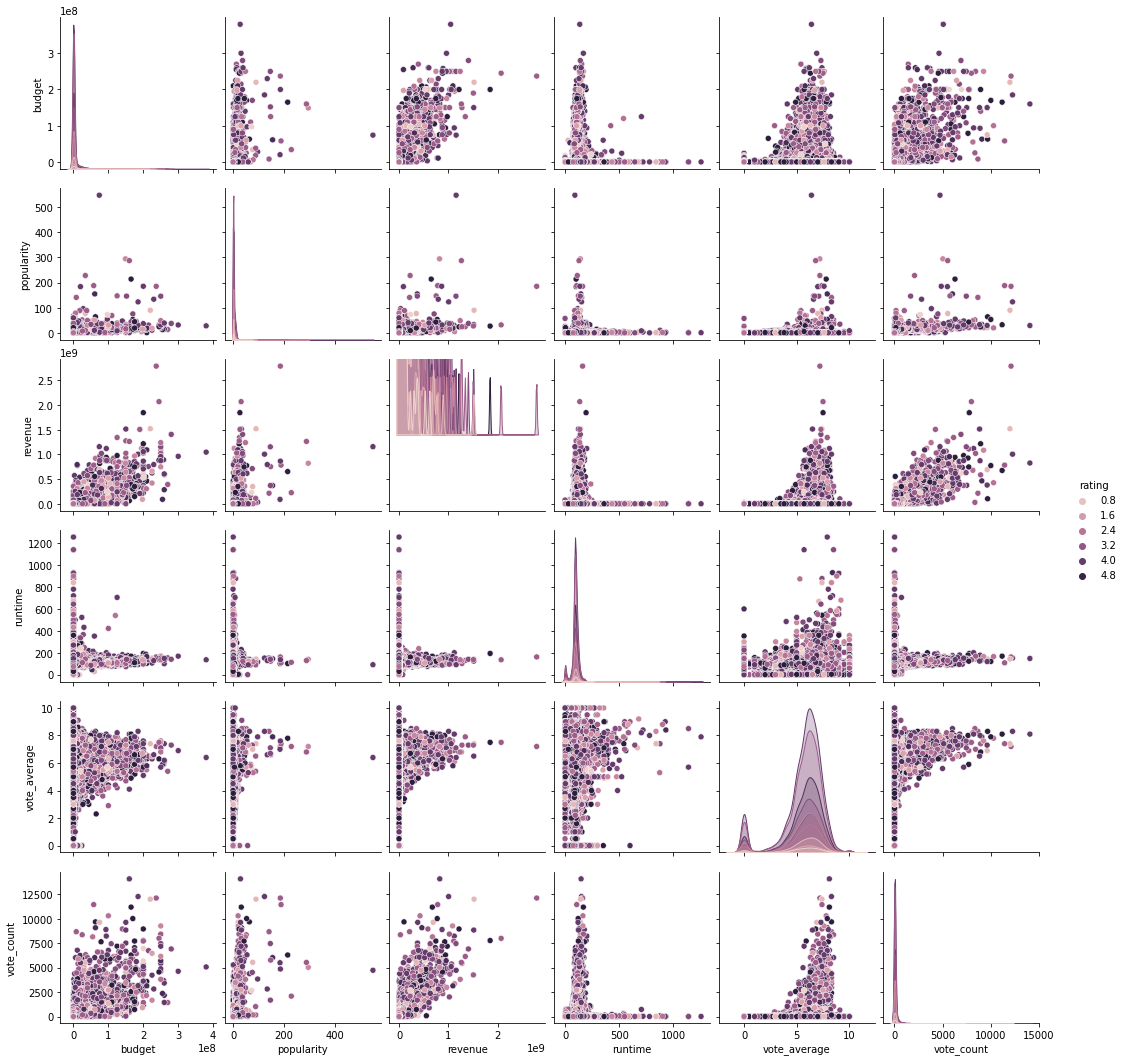

In [ ]:
#pairplot - показывает отношения между всеми парами переменных
sns.pairplot(data=df, hue='rating')

РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ

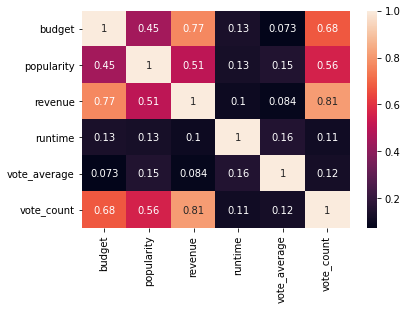

In [ ]:
#визуализация матрицу корреляции в виде тепловой карты
cols = ['budget','popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
hm = sns.heatmap(df[cols].corr(), cbar=True, annot=True)

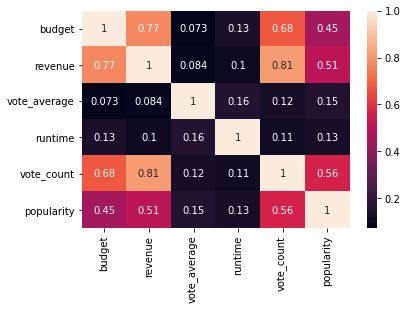

In [ ]:
#визуализация матрицу корреляции в виде тепловой карты
cols = ['budget','revenue', 'vote_average', 'runtime', 'vote_count','popularity']
hm = sns.heatmap(df[cols].corr(), cbar=True, annot=True)

In [ ]:
#нормализация

import sklearn.preprocessing as preprocessing
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(df)
norm_data = pd.DataFrame(columns=df.columns, data=mm_scalar.transform(df))
norm_data.head()




# def norm(x):
#   return (x - X['mean']) / df['runtime']
# normed_train_data = norm(X)
# normed_test_data = norm(y)

,budget,popularity,revenue,runtime,vote_average,vote_count,rating
0,0.078947,0.040087,0.133988,0.064490,0.77,0.384725,0.111111
1,0.171053,0.031079,0.094261,0.082803,0.69,0.171439,0.888889
2,0.000000,0.021394,0.000000,0.080414,0.65,0.006536,1.000000
3,0.042105,0.007049,0.029216,0.101115,0.61,0.002416,1.000000
4,0.000000,0.015320,0.027468,0.084395,0.57,0.012291,1.000000


In [ ]:
#общая статистика
train_stats = norm_data.describe()
train_stats.pop("runtime")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
budget,45203.0,0.011180,0.045977,0.0,0.000000,0.000000,0.000000,1.0
popularity,45203.0,0.005364,0.010994,0.0,0.000720,0.002075,0.006794,1.0
revenue,45203.0,0.004043,0.023138,0.0,0.000000,0.000000,0.000000,1.0
vote_average,45203.0,0.562937,0.190891,0.0,0.500000,0.600000,0.680000,1.0
vote_count,45203.0,0.007851,0.035001,0.0,0.000213,0.000710,0.002416,1.0
rating,45203.0,0.665386,0.230830,0.0,0.555556,0.666667,0.777778,1.0


In [ ]:
# from sklearn.model_selection import train_test_split
#разделение данных на обучающую и тестовую выборки
X = norm_data[['budget','vote_average', 'runtime', 'vote_count', 'popularity']].values
Y = norm_data['revenue'].values

# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

ПРОВЕРКА КАЧЕСТВО МОДЕЛИ: практика



In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
#строим простую полносвязную нейронную сеть
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#описание модели
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#испробуем модель
example_batch = X[:10]
example_result = model.predict(example_batch)
example_result

array([[0.4861917 ],
       [0.48877922],
       [0.49642506],
       [0.49560645],
       [0.49708375],
       [0.490541  ],
       [0.49181712],
       [0.49706504],
       [0.4939145 ],
       [0.49130982]], dtype=float32)

ОБУЧЕНИЕ

In [ ]:
#компилируем сеть
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# model = make_nn(X.shape[1], 1)
from keras import callbacks

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=3,
#     Так как у нас теперь есть рання остановка мы можем увеличеть количество эпох (было 100 стало 300)
    epochs=300,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
#             На основе какого значения будет приниматься решеня об остановке
            monitor='val_mae',
#             Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
#             Количество эпок в резельтате которых если значение не изменилось, то произвести остановку
            patience=50,
#             "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.01,
        )
    ]
    
)

Начинаем обучение сети
Epoch 1/300
12054/12054 [==============================] - 14s 1ms/step - loss: 0.0049 - mae: 0.0196 - val_loss: 5.3941e-05 - val_mae: 0.0012
Epoch 2/300
12054/12054 [==============================] - 13s 1ms/step - loss: 1.9482e-04 - mae: 0.0038 - val_loss: 5.8683e-05 - val_mae: 0.0019
Epoch 3/300
12054/12054 [==============================] - 13s 1ms/step - loss: 1.5158e-04 - mae: 0.0033 - val_loss: 5.1103e-05 - val_mae: 0.0015
Epoch 4/300
12054/12054 [==============================] - 13s 1ms/step - loss: 1.6939e-04 - mae: 0.0034 - val_loss: 5.6814e-05 - val_mae: 0.0020
Epoch 5/300
12054/12054 [==============================] - 13s 1ms/step - loss: 1.5038e-04 - mae: 0.0034 - val_loss: 5.2213e-05 - val_mae: 0.0016
Epoch 6/300
12054/12054 [==============================] - 13s 1ms/step - loss: 1.4474e-04 - mae: 0.0033 - val_loss: 6.0410e-05 - val_mae: 0.0014
Epoch 7/300
12054/12054 [==============================] - 13s 1ms/step - loss: 1.6031e-04 - mae: 0.0032 

In [ ]:
#обучаем
# history = model.fit(X, Y, epochs=10, validation_split=0.1, verbose=2 )

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
46,0.000135,0.002918,0.000049,0.001397,46
47,0.000133,0.002881,0.000047,0.001236,47
48,0.000136,0.002908,0.000050,0.001375,48
49,0.000136,0.002872,0.000042,0.001069,49
50,0.000136,0.002843,0.000052,0.000947,50


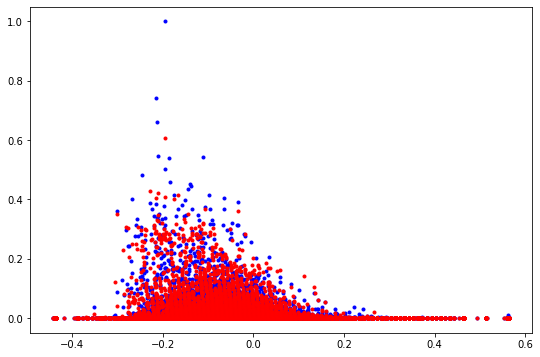

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

pca = PCA(n_components=1).fit(X)
fig, ax = plt.subplots(figsize=(9, 6))

pca_x = pca.transform(X)

ax.plot(pca_x, Y, 'bo', markersize=3)
ax.plot(pca_x, model.predict(X), 'ro', markersize=3)

## 3. Изучить приемы визуализации данных

**Полезные ссылки**
1. [Основная библиотека для вывода графиков (англ)](https://matplotlib.org/)
2. [Дополнение для основной библиотеки вывода графиков (англ)](https://seaborn.pydata.org/)

**Демонстрация работы**
1. [Демонстрация работы связки библиотек matplotlib, pandas и seaborn](https://habr.com/ru/post/468295/)
2. [Демонстрация анализа данных на основе графиков](https://yadi.sk/i/A0rJXK7XjXMa2w)